In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data
data = pd.read_csv('finance_liquor_sales.csv', parse_dates=['date'], index_col='date')
#check NaN values
print("Missing Data:\n", data.isna().sum())

Missing Data:
 invoice_and_item_number     0
store_number                0
store_name                  0
address                     0
city                        0
zip_code                    0
store_location             18
county_number               1
county                      1
category                    3
category_name               9
vendor_number               0
vendor_name                 0
item_number                 0
item_description            0
pack                        0
bottle_volume_ml            0
state_bottle_cost           0
state_bottle_retail         0
bottles_sold                0
sale_dollars                0
volume_sold_liters          0
volume_sold_gallons         0
dtype: int64


In [3]:
#select date range 2016 - 2019
data.index = data.index.year
selected_data = data[(data.index >= 2016) & (data.index <= 2019)]

In [4]:
selected_data = selected_data.reset_index()

In [5]:
#clean_data 
cleaned_data = selected_data.dropna(subset=['county', 'category'])

In [6]:
#group data (automatically sorted)
grouped_data = cleaned_data.groupby(['zip_code', 'item_number'])['bottles_sold'].sum().reset_index()
grouped_data

,zip_code,item_number,bottles_sold
0,50010.0,946574,288
1,50022.0,86507,4
2,50111.0,77805,108
3,50131.0,38089,48
4,50158.0,48099,24
...,...,...,...
67,52627.0,67586,36
68,52732.0,45248,24
69,52761.0,82847,4
70,52803.0,41844,3


In [7]:
#find top 5 values
top_5 = grouped_data['bottles_sold'].nlargest(5).index

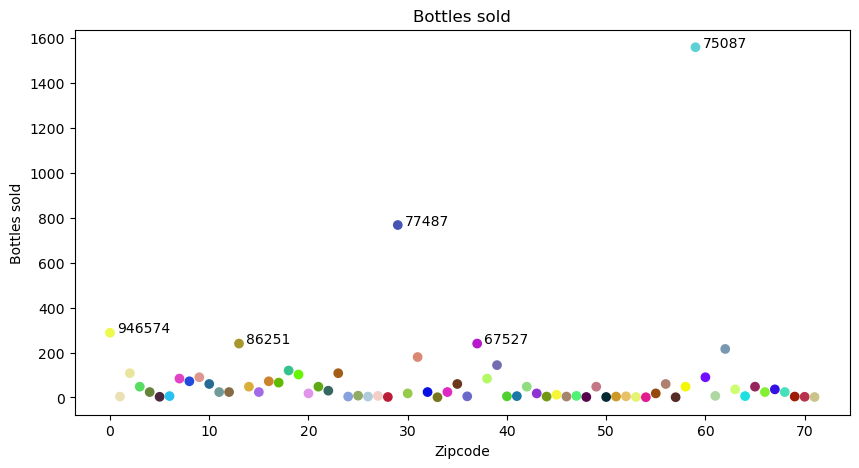

In [8]:
#figure matplotlib 
fig, ax = plt.subplots(figsize=(10, 5))
x_values = range(len(grouped_data['zip_code']))

colors = np.random.rand(len(x_values), 3)

plt.scatter(x_values,grouped_data['bottles_sold'], c=colors)

for i in top_5:
    plt.annotate(grouped_data['item_number'][i],
                 (x_values[i], grouped_data['bottles_sold'][i]),
                 textcoords="offset points",
                 xytext=(5,0),
                 ha='left')


plt.xlabel('Zipcode')
plt.ylabel('Bottles sold')
plt.title('Bottles sold')
plt.show()

In [9]:
#group data %sale 
grouped_sales_data = cleaned_data.groupby(['store_name'])['sale_dollars'].sum().reset_index()
sorted_sales_data = grouped_sales_data.sort_values(by='sale_dollars', ascending = True)
sorted_sales_data['sales_percentage'] = (sorted_sales_data['sale_dollars']/sorted_sales_data['sale_dollars'].sum())*100
sorted_sales_data.tail(15)

,store_name,sale_dollars,sales_percentage
15,Fareway Stores #983 / Grimes,1296.00,2.115360
11,Fareway Stores #153 / W Des Moines,1349.28,2.202324
9,Fareway Stores #067 / Evansdale,1349.40,2.202520
20,Hy-Vee / Waukee,1518.72,2.478888
28,Hy-Vee Food Store / Fort Dodge,1563.84,2.552534
23,Hy-Vee Food Store #2 / Waterloo,1992.15,3.251631
10,Fareway Stores #138 / Pleasant Hill,2295.00,3.745949
4,Central City 2,2580.60,4.212112
37,Hy-Vee Wine and Spirits / WDM,3372.30,5.504342
3,Cedar Ridge Vineyards,3712.50,6.059624


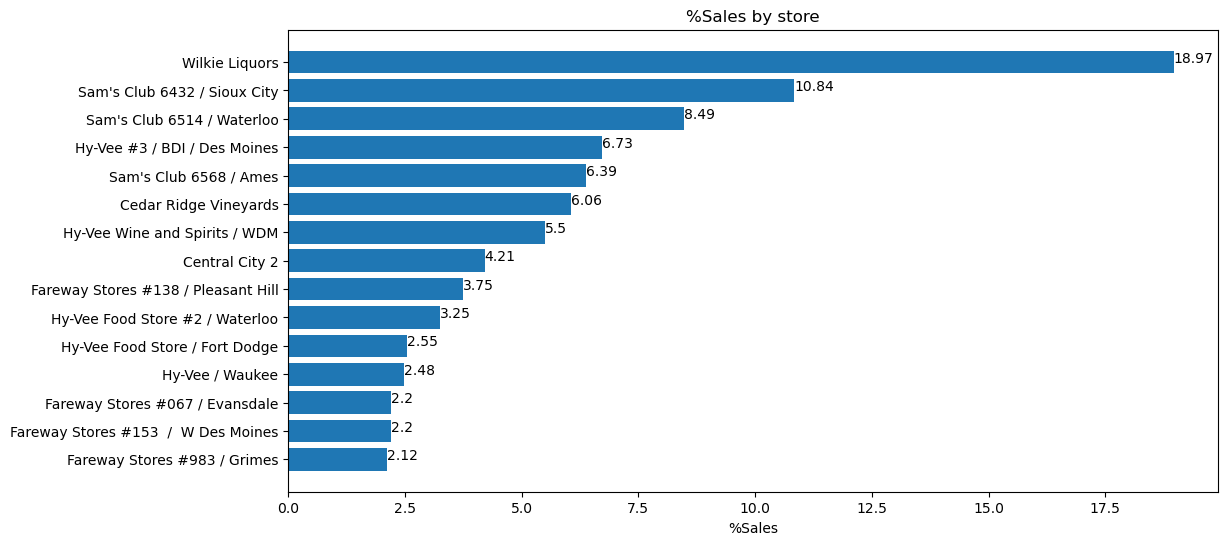

In [10]:
#figure Horizontal Bar Plot %sales

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(sorted_sales_data['store_name'].tail(15), sorted_sales_data['sales_percentage'].tail(15))

for index, value in enumerate(sorted_sales_data['sales_percentage'].tail(15)):
    plt.text(value, index, str(round(value,2)))
    
plt.xlabel('%Sales')
plt.title('%Sales by store')
plt.show()
